<a href="https://colab.research.google.com/github/WinstonZheng8/NY-Housing-Project/blob/main/NY_Housing_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - NY Housing

UCR STAT 206

**The Data Serpents**

Ting-yu Liu, Nhi Truong, Jennifer Maldonado, Nancy Aguilera, Winston Zheng

2025-03-15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

- The real estate market in New York is highly dynamic and influenced by numerous factors, from location and property characteristics to economic conditions. Understanding these determinants is essential for homeowners, buyers, investors, and policymakers.

- This project aims to analyze the key factors affecting housing prices in New York using statistical and machine learning techniques.


- Through data-driven exploration, we investigate how attributes such as property size, number of bedrooms and bathrooms, neighborhood, and street names impact home values.

- Additionally, we assess the predictive power of multiple regression and other modeling approaches to estimate housing prices accurately. By identifying significant price determinants, this study provides insights that can guide real estate decisions and market strategies.

# Project Overview
**Objective:**
To analyze the factors influencing house prices in New York and develop a predictive model to estimate property values.

**Research Questions:**
* Key Determinants: What are the primary factors that drive housing prices in New York?

* Predictive Modeling: Can we build an accurate model to forecast housing prices based on available features?




# Methodology & Workflow
**1. Data Cleaning and Preprocessing (Ting):**

Handling missing values and ensuring data completeness.
Catergoris reduction.
Recategorization Geographic Divisions.
Feature scaling and normalization to standardize data.

**2. Exploratory Data Analysis (Jen):**

Generating summary statistics to understand dataset characteristics.
Visualizing data distributions using histograms, box plots, and scatter plots.
Performing correlation analysis to identify relationships between variables.

**3. Feature Engineering (Winston):**

Creating new derived features to enhance model performance.
Encoding categorical variables for machine learning compatibility.
Identifying and removing redundant or irrelevant features.

**4. Predictive Modeling (Nhi, Nancy, Winston):**

Implementing Multiple Linear Regression for price prediction.
Exploring Logistic Regression for binary classification of high vs. low-priced homes.
Applying Random Forest Regression to capture non-linear relationships and improve prediction accuracy.

# Packages & Loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
html="https://drive.google.com/uc?export=download&id=1aHDXkGfJcxPXYBoqqWGEkE4AO7lc_Otn"
housing = pd.read_csv(html)

# Data Cleaning and Preprocessing

**Understanding data**

Structure:
- 4801 rows
- 17 columns (Categorical:11, Numerical:6)

No missing value: The author filled missing value by mean.


In [ ]:
housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.00,1400.00,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.76,-73.97
1,Brokered by Serhant,Condo for sale,195000000,7,10.00,17545.00,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.77,-73.98
2,Brokered by Sowae Corp,House for sale,260000,4,2.00,2015.00,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.54,-74.20
3,Brokered by COMPASS,Condo for sale,69000,3,1.00,445.00,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.76,-73.97
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.37,14175.00,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.77,-73.97


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
housing.isnull().sum()

,0
BROKERTITLE,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
ADDRESS,0
STATE,0
MAIN_ADDRESS,0
ADMINISTRATIVE_AREA_LEVEL_2,0


**Category reduction**


Broker

There are 1,036 unique brokers in the dataset. Initially, we planned to categorize them into "No Broker" and "Broker", but the "No Broker" category contains only 35 instances out of approximately 5,000 observations. Given its small proportion, this classification may not provide meaningful insights or significantly impact the analysis.

In [ ]:
#BROKERTITLE
print("Categories_Broker:", len(housing['BROKERTITLE'].unique()))
BROKERTITLE_counts = housing['BROKERTITLE'].value_counts()
BROKERTITLE_counts

print('No Broker:',(housing['BROKERTITLE'] == 'NoBroker').sum())

Categories_Broker: 1036
No Broker: 35


Type



*   Remove categories with too few entries
*   Category reduction:

         "Co-op for sale", "Condo for sale", "Condop for sale" → "Condo/Co-op"
         
         "House for sale", "Townhouse for sale", "Multi-family home for sale" → "Residential_Home"




In [ ]:
#TYPE
print("Type:", len(housing['TYPE'].unique()))
TYPE_counts = housing['TYPE'].value_counts()
TYPE_counts

Type: 13


,count
TYPE,
Co-op for sale,1450
House for sale,1012
Condo for sale,891
Multi-family home for sale,727
Townhouse for sale,299
Pending,243
Contingent,88
Land for sale,49
For sale,20


In [ ]:
#remove unnecessary categories
# Define the categories to keep
keep_categories = [
    "Co-op for sale",
    "Condo for sale",
    "House for sale",
    "Townhouse for sale",
    "Multi-family home for sale"
]

# Filter dataset to include only these categories
new_housing = housing[housing["TYPE"].isin(keep_categories)]

# Display the updated category counts
print(new_housing["TYPE"].value_counts())


TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Name: count, dtype: int64


In [ ]:
# Define mapping of property types
category_mapping = {
    "Co-op for sale": "Condo/Co-op",
    "Condo for sale": "Condo/Co-op",
    "Condop for sale": "Condo/Co-op",
    "House for sale": "Residential_Home",
    "Townhouse for sale": "Residential_Home",
    "Multi-family home for sale": "Residential_Home",
}

# Apply classification
new_housing["PROPERTY_TYPE"] = new_housing["TYPE"].map(category_mapping)

# Drop any rows where TYPE wasn't in the mapping
new_housing = new_housing.dropna(subset=["PROPERTY_TYPE"])

# Display counts of new categories
print(new_housing["PROPERTY_TYPE"].value_counts())

PROPERTY_TYPE
Condo/Co-op         2341
Residential_Home    2038
Name: count, dtype: int64


<ipython-input-9-0272b2bc09f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_housing["PROPERTY_TYPE"] = new_housing["TYPE"].map(category_mapping)


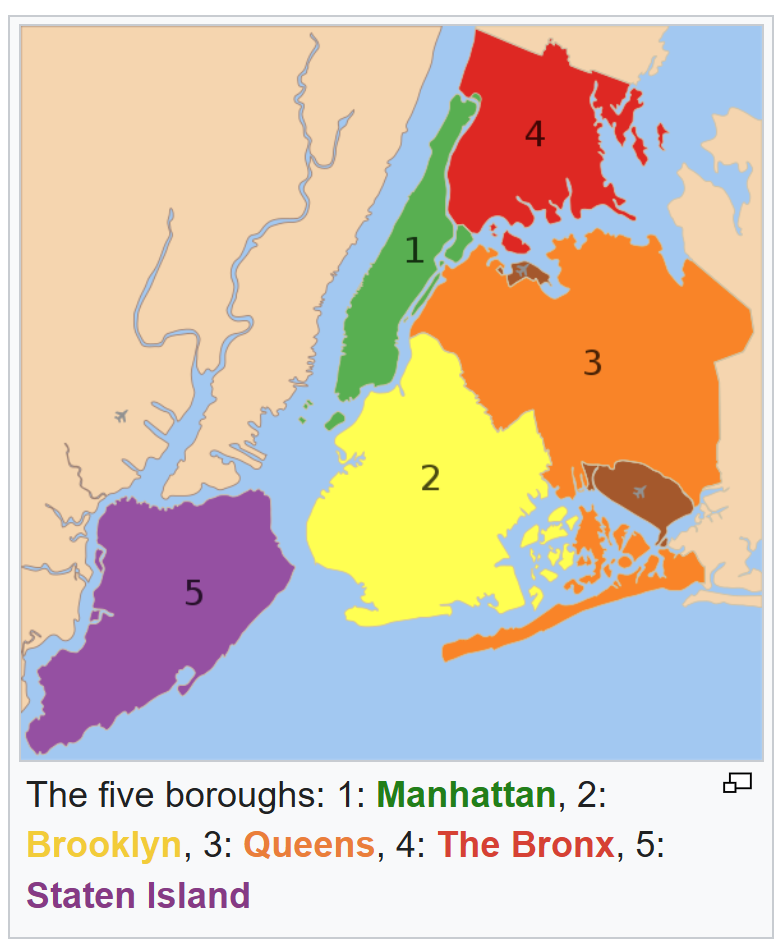



Geographic Divisions
> Classify: District, Neighborhoods

| County (ADMINISTRATIVE_AREA_LEVEL_2) | District (Borough) |
|--------------------------------------|----------------------------------|
| New York County                      | Manhattan                       |
| Kings County                          | Brooklyn                        |
| Queens County                         | Queens                          |
| Bronx County                          | The Bronx                       |
| Richmond County                       | Staten Island                   |

In this section, The dataset already included some administrative divisions, but upon inspection, we found many misclassifications. To ensure accuracy, we extracted ZIP codes from the "FORMATTED_ADDRESS" field to correctly identify districts and neighborhoods, as the original classifications were unreliable.



Reference: [USPS-ZIP Codes by Area and District codes](https://postalpro.usps.com/ZIP_Locale_Detail)

In [ ]:
#ADMINISTRATIVE_AREA_LEVEL_2 =County
print("Adminstrative:", len(housing['ADMINISTRATIVE_AREA_LEVEL_2'].unique()))
# AD_AREA_counts = housing['ADMINISTRATIVE_AREA_LEVEL_2'].value_counts()
# AD_AREA_counts

Adminstrative: 29


In [ ]:
#STATE
print('State:', len(housing['STATE'].unique()))

State_counts = housing['STATE'].value_counts()
State_counts

State: 308


,count
STATE,
"Brooklyn, NY 11235",102
"Brooklyn, NY 11209",94
"Forest Hills, NY 11375",91
"Brooklyn, NY 11234",90
"Staten Island, NY 10314",86
...,...
"Queens, NY 11427",1
"Queens, NY 11429",1
"Long Island City, NY 11109",1


In [ ]:
#LOCALITY
print("locality:", len(housing['LOCALITY'].unique()))

Local_counts = housing['LOCALITY'].value_counts()
print(Local_counts)

locality: 11
LOCALITY
New York           2505
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Brooklyn              6
Queens                6
The Bronx             5
Flatbush              1
Name: count, dtype: int64


In [ ]:
#SUBLOCALITY
print("Sublocality:", len(housing['SUBLOCALITY'].unique()))

Sub_counts = housing['SUBLOCALITY'].value_counts()
print(Sub_counts)

Sublocality: 21
SUBLOCALITY
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Riverdale              4
Flushing               4
Coney Island           3
East Bronx             1
Brooklyn Heights       1
Jackson Heights        1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64


In [ ]:
#Remove redundant 10 columns:'BROKERTITLE','TYPE','STATE','ADDRESS','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME'
new_housing = new_housing.drop(['BROKERTITLE','TYPE','STATE','ADDRESS','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME'], axis=1)
new_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4379 entries, 0 to 4800
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRICE              4379 non-null   int64  
 1   BEDS               4379 non-null   int64  
 2   BATH               4379 non-null   float64
 3   PROPERTYSQFT       4379 non-null   float64
 4   FORMATTED_ADDRESS  4379 non-null   object 
 5   LATITUDE           4379 non-null   float64
 6   LONGITUDE          4379 non-null   float64
 7   PROPERTY_TYPE      4379 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 307.9+ KB


In [ ]:
new_housing['ZIP'] = new_housing['FORMATTED_ADDRESS'].str.extract(r'(\b\d{5}\b)')

#Use zip code to find county and distirct
zip_html='https://docs.google.com/spreadsheets/d/1F1SVfAjyJ_crzYABMw3nbz3aMapYBwe0/export?format=csv'
zip_table=pd.read_csv(zip_html)

zip_table['ZIP']=zip_table['ZIP'].astype(str)

new_housing=new_housing.merge(zip_table, on='ZIP', how='left')
new_housing = new_housing.dropna()

In [ ]:
new_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4288 entries, 0 to 4378
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRICE              4288 non-null   int64  
 1   BEDS               4288 non-null   int64  
 2   BATH               4288 non-null   float64
 3   PROPERTYSQFT       4288 non-null   float64
 4   FORMATTED_ADDRESS  4288 non-null   object 
 5   LATITUDE           4288 non-null   float64
 6   LONGITUDE          4288 non-null   float64
 7   PROPERTY_TYPE      4288 non-null   object 
 8   ZIP                4288 non-null   object 
 9   Neighborhoods      4288 non-null   object 
 10  Borough            4288 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 402.0+ KB


We used a map visualization to verify the accuracy of the classification.

There were a few minor misclassifications.

In [ ]:
px.scatter_map(new_housing,
  lat = 'LATITUDE',
  lon = 'LONGITUDE',
  color = 'Borough',
  zoom = 1,
  color_continuous_scale = 'Bluered'
)

Fix the misclassification of borough

In [ ]:
#Queens-North
Queens_N=new_housing[new_housing['Borough']=='Queens']
Queens_N.describe()
Queens_N_lat_min=40.70973
Queens_N_lat_max=40.75926
Queens_N_lon_min=-73.92574
Queens_N_lon_max=-73.81883

query_queens_N=new_housing[(new_housing['LATITUDE']>=Queens_N_lat_min) &\
 (new_housing['LATITUDE']<=Queens_N_lat_max) &\
  (new_housing['LONGITUDE']>=Queens_N_lon_min) &\
   (new_housing['LONGITUDE']<=Queens_N_lon_max)]

miss_N=query_queens_N[query_queens_N['Borough']!='Queens']

new_housing = new_housing.drop(miss_N.index)

In [ ]:
#Queens- South
Queens_S=new_housing[new_housing['Borough']=='Queens']
Queens_S.describe()
Queens_S_lat_min=40.57372
Queens_S_lat_max=40.59821
Queens_S_lon_min=-73.857
Queens_S_lon_max=-73.79118

query_queens_S=new_housing[(new_housing['LATITUDE']>=Queens_S_lat_min) &\
 (new_housing['LATITUDE']<=Queens_S_lat_max) &\
  (new_housing['LONGITUDE']>=Queens_S_lon_min) &\
   (new_housing['LONGITUDE']<=Queens_S_lon_max)]

miss_S=query_queens_S[query_queens_S['Borough']!='Queens']

new_housing = new_housing.drop(miss_S.index)

In [ ]:
px.scatter_map(new_housing,
  lat = 'LATITUDE',
  lon = 'LONGITUDE',
  color = 'Borough',
  zoom = 1,
  color_continuous_scale = 'Bluered'
)

In [ ]:
new_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4285 entries, 0 to 4378
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRICE              4285 non-null   int64  
 1   BEDS               4285 non-null   int64  
 2   BATH               4285 non-null   float64
 3   PROPERTYSQFT       4285 non-null   float64
 4   FORMATTED_ADDRESS  4285 non-null   object 
 5   LATITUDE           4285 non-null   float64
 6   LONGITUDE          4285 non-null   float64
 7   PROPERTY_TYPE      4285 non-null   object 
 8   ZIP                4285 non-null   object 
 9   Neighborhoods      4285 non-null   object 
 10  Borough            4285 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 401.7+ KB


In [ ]:
#Neighborhoods
print('Neighborhoods:', len(new_housing['Neighborhoods'].unique()))

N_counts = new_housing['Neighborhoods'].value_counts()
N_counts

Neighborhoods: 43


,count
Neighborhoods,
NEW YORK,1208
BROOKLYN,1098
BRONX,475
STATEN ISLAND,430
FLUSHING,112
FOREST HILLS,87
BAYSIDE,71
JACKSON HEIGHTS,69
REGO PARK,61


In [ ]:
#borough
borough_counts = new_housing['Borough'].value_counts()
print(borough_counts)

Borough
Manhattan        1208
Brooklyn         1098
Queens           1074
The Bronx         475
Staten Island     430
Name: count, dtype: int64


**Numerical vairables:**

Identify any unreasonable values in the describe table.



*   some prices are extremely large or small
*   the number of beds or bath=0? =50?
*   PROPERTYSQFT is extremely large

sol:remove outliers




In [ ]:
new_housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4285.00,4285.00,4285.00,4285.00,4285.00,4285.00
mean,2506198.57,3.40,2.40,2213.76,40.72,-73.94
std,33178955.36,2.69,2.02,2484.33,0.09,0.10
min,49500.00,1.00,0.00,250.00,40.50,-74.25
25%,499998.00,2.00,1.00,1200.00,40.64,-73.99
50%,849998.00,3.00,2.00,2184.21,40.73,-73.95
75%,1530000.00,4.00,3.00,2184.21,40.77,-73.88
max,2147483647.00,50.00,50.00,65535.00,40.91,-73.70


In [ ]:
subset_bath_zero = new_housing[new_housing["BATH"] == 0]
subset_bath_zero

,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PROPERTY_TYPE,ZIP,Neighborhoods,Borough
3067,14995000,3,0.00,2184.21,"50 W 86th St, New York, NY 10024, USA",40.79,-73.97,Residential_Home,10024,NEW YORK,Manhattan


Remove outliers

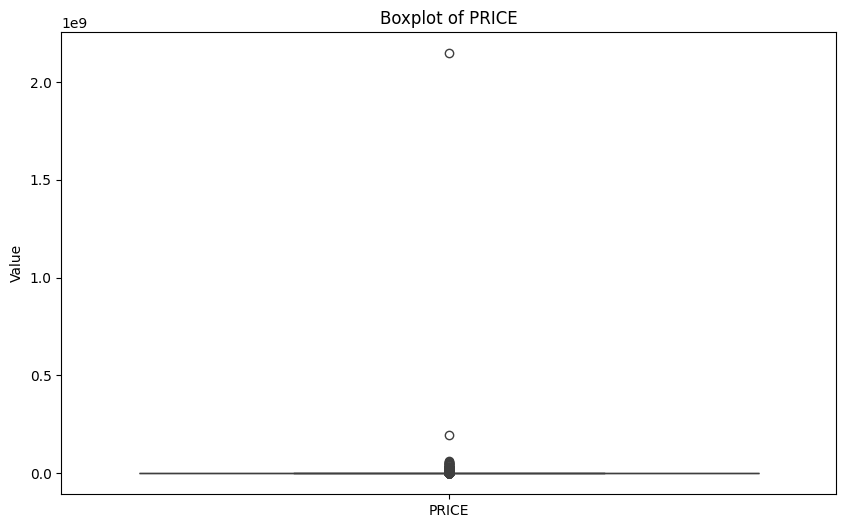

In [ ]:
#price
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=new_housing[['PRICE']])
plt.title('Boxplot of PRICE')
plt.ylabel('Value')
plt.show()

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = new_housing['PRICE'].quantile(0.25)
Q3 = new_housing['PRICE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR #is negative, so use quantile=0.005 as lower bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=new_housing['PRICE'].quantile(0.005)

Number of outliers removed: 527


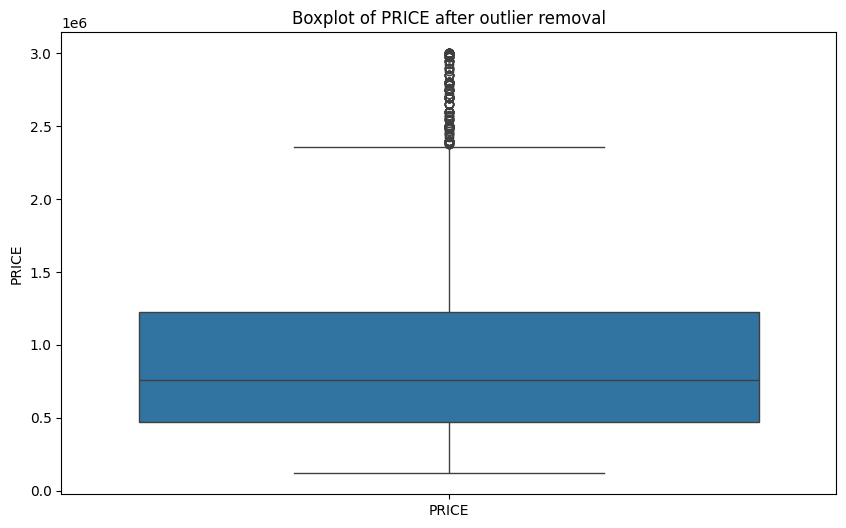

In [ ]:
# Remove outliers
housing_no_outliers = new_housing[(new_housing['PRICE'] >= lower_bound) & (new_housing['PRICE'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(new_housing) - len(housing_no_outliers)}")

# housing_no_outliers=housing[(housing['PRICE']<=5*10**8)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_no_outliers[['PRICE']])
plt.title('Boxplot of PRICE after outlier removal')
plt.ylabel('PRICE')
plt.show()

In [ ]:
# Create a DataFrame to store the price statistics
price_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Before Outlier Removal': [new_housing['PRICE'].mean(), new_housing['PRICE'].median(), new_housing['PRICE'].std(), new_housing['PRICE'].min(), new_housing['PRICE'].max()],
    'After Outlier Removal': [housing_no_outliers['PRICE'].mean(), housing_no_outliers['PRICE'].median(), housing_no_outliers['PRICE'].std(), housing_no_outliers['PRICE'].min(), housing_no_outliers['PRICE'].max()]
})

# Display the table
price_stats


,Statistic,Before Outlier Removal,After Outlier Removal
0,Mean,2506198.57,930946.33
1,Median,849998.00,758944.00
2,Standard Deviation,33178955.36,636450.77
3,Min,49500.00,119888.00
4,Max,2147483647.00,3000000.00


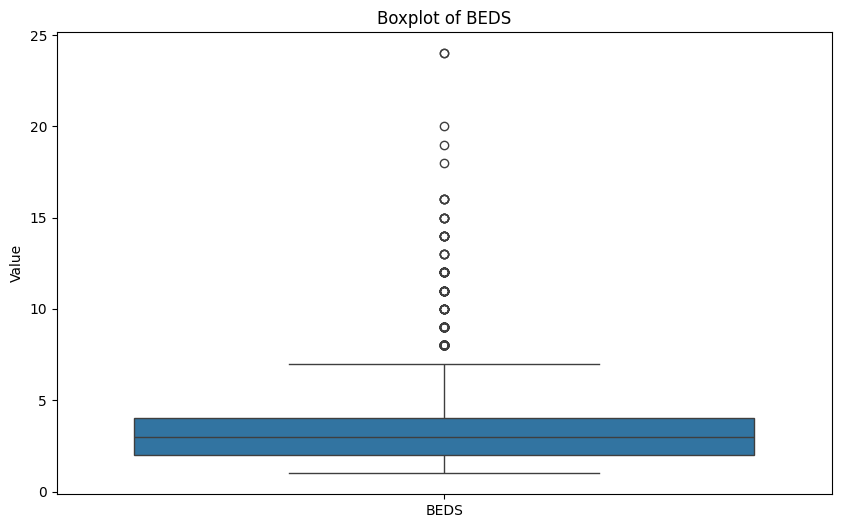

In [ ]:
#beds
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=housing_no_outliers[['BEDS']])
plt.title('Boxplot of BEDS')
plt.ylabel('Value')
plt.show()

In [ ]:
housing_no_outliers.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3758.00,3758.00,3758.00,3758.00,3758.00,3758.00
mean,930946.33,3.17,2.13,1867.30,40.71,-73.94
std,636450.77,2.18,1.45,1072.04,0.09,0.10
min,119888.00,1.00,1.00,250.00,40.50,-74.25
25%,468250.00,2.00,1.00,1100.00,40.63,-73.98
50%,758944.00,3.00,2.00,2160.00,40.72,-73.94
75%,1225000.00,4.00,2.37,2184.21,40.77,-73.86
max,3000000.00,24.00,32.00,21000.00,40.91,-73.70


<ipython-input-32-25dc65dee602>:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Number of outliers removed: 1204


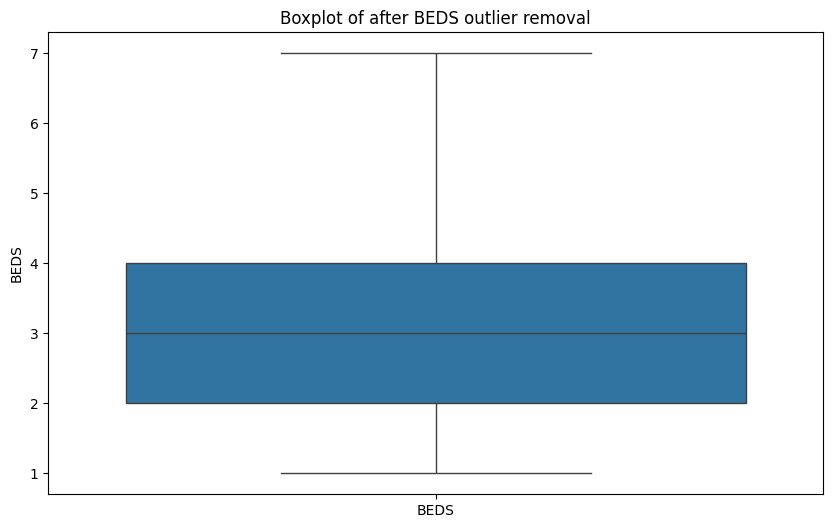

In [ ]:
# Calculate Q1, Q3, and IQR
Q1_B = housing_no_outliers['BEDS'].quantile(0.25)
Q3_B = housing_no_outliers['BEDS'].quantile(0.75)
IQR_B = Q3_B - Q1_B

# Define bounds for outliers
lower_bound_B = Q1_B - 1.5 * IQR_B #is negative, so use beds=1 as LB
upper_bound_B = Q3_B + 1.5 * IQR_B
lower_bound_B =1


# Remove outliers
housing_no_outliers = housing_no_outliers[(housing_no_outliers['BEDS'] >= lower_bound_B) & (new_housing['BEDS'] <= upper_bound_B)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(housing) - len(housing_no_outliers)}")


plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_no_outliers[['BEDS']])
plt.title('Boxplot of after BEDS outlier removal')
plt.ylabel('BEDS')
plt.show()

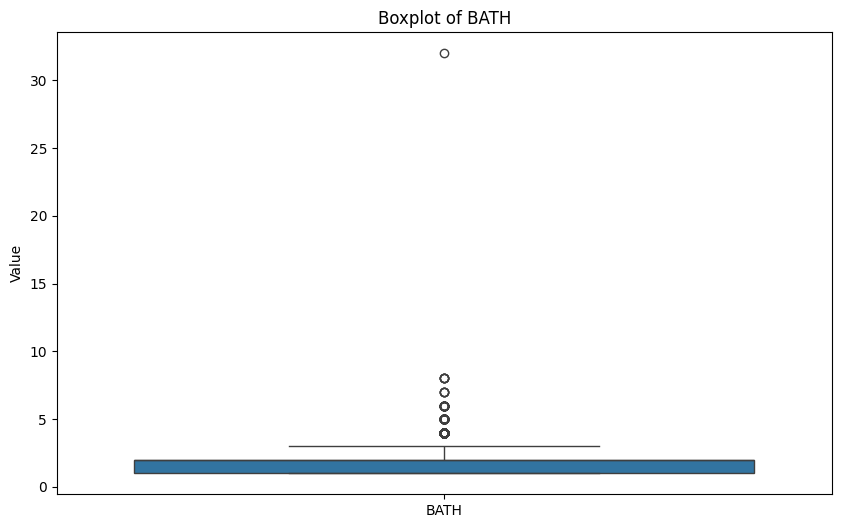

In [ ]:
#BATH
housing_no_outliers = housing_no_outliers[(housing_no_outliers['BATH'] >= 1)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_no_outliers[['BATH']])
plt.title('Boxplot of BATH')
plt.ylabel('Value')
plt.show()

<ipython-input-34-a40198ac2ae1>:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Number of outliers removed: 754


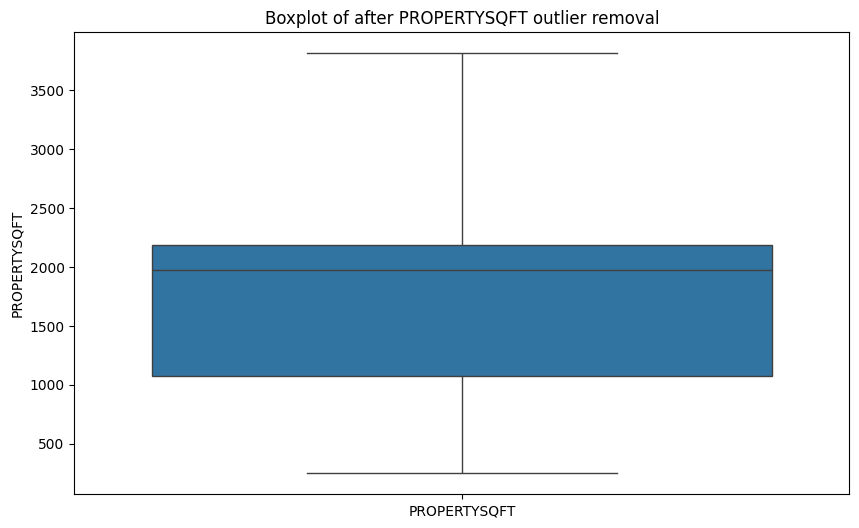

In [ ]:
#PROPERTYSQFT

# Calculate Q1, Q3, and IQR
Q1_P = housing_no_outliers['PROPERTYSQFT'].quantile(0.25)
Q3_P = housing_no_outliers['PROPERTYSQFT'].quantile(0.75)
IQR_P = Q3_P - Q1_P

# Define bounds for outliers
lower_bound_P = Q1_P - 1.5 * IQR_P
upper_bound_P = Q3_P + 1.5 * IQR_P



# Remove outliers
housing_no_outliers = housing_no_outliers[(housing_no_outliers['PROPERTYSQFT'] >= lower_bound_P) & (new_housing['PROPERTYSQFT'] <= upper_bound_P)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(new_housing) - len(housing_no_outliers)}")


plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_no_outliers[['PROPERTYSQFT']])
plt.title('Boxplot of after PROPERTYSQFT outlier removal')
plt.ylabel('PROPERTYSQFT')
plt.show()

Cleaned data=>**housing_no_outliers**


*   3531 rows
*   11 columns(6 numerical, 5 categorical)


In [ ]:
housing_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 4378
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRICE              3531 non-null   int64  
 1   BEDS               3531 non-null   int64  
 2   BATH               3531 non-null   float64
 3   PROPERTYSQFT       3531 non-null   float64
 4   FORMATTED_ADDRESS  3531 non-null   object 
 5   LATITUDE           3531 non-null   float64
 6   LONGITUDE          3531 non-null   float64
 7   PROPERTY_TYPE      3531 non-null   object 
 8   ZIP                3531 non-null   object 
 9   Neighborhoods      3531 non-null   object 
 10  Borough            3531 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 331.0+ KB


In [ ]:
# file_name = "housing_no_outliers.xlsx"
# housing_no_outliers.to_excel(file_name, index=False)
# from google.colab import files
# files.download(file_name)

Compared the correlation matrix before and after remove outliers:

After removing outliers, the correlation between Price and three numerical variables (Beds, Bath, and PropertySQFT) significantly increased, indicating stronger relationships. This suggests that outliers previously distorted the correlations, and their removal has improved the reliability of the analysis.

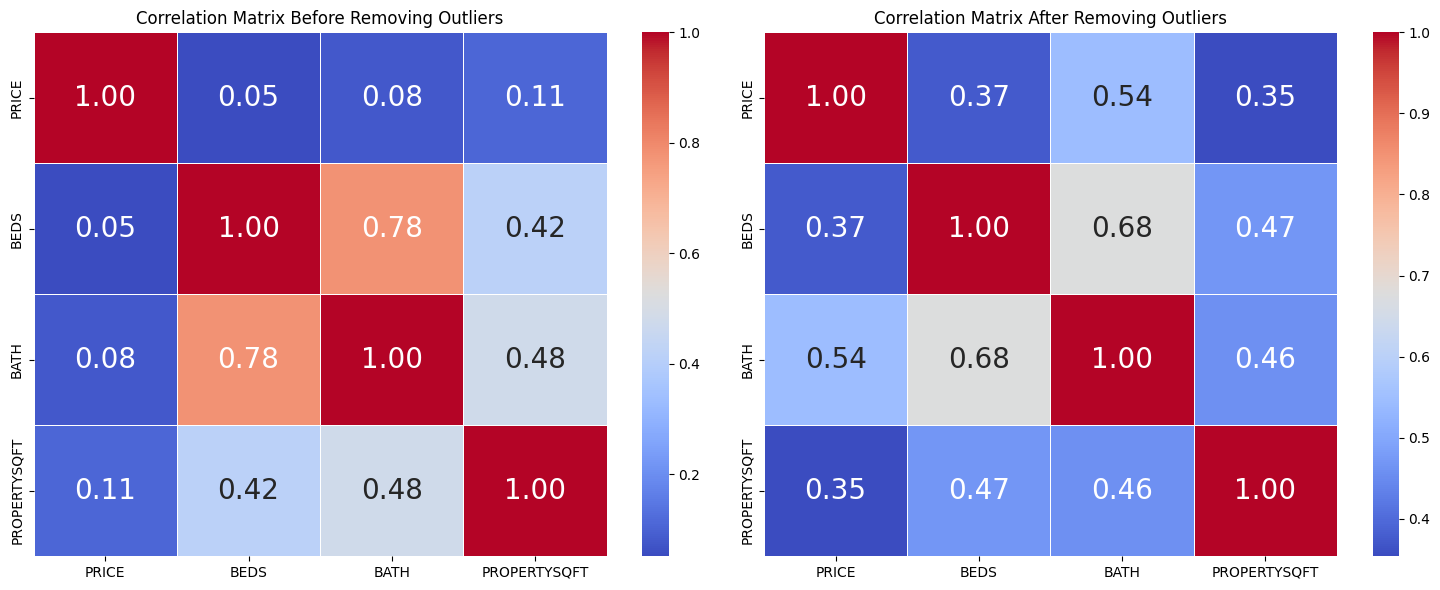

In [ ]:
# Compute correlation matrices
numerical_cols_before = new_housing[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
correlation_matrix_before = numerical_cols_before.corr()

numerical_cols_after = housing_no_outliers[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
correlation_matrix_after = numerical_cols_after.corr()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# First heatmap: Before removing outliers
sns.heatmap(correlation_matrix_before, annot=True, annot_kws={"size": 20}, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Matrix Before Removing Outliers')

# Second heatmap: After removing outliers
sns.heatmap(correlation_matrix_after, annot=True, annot_kws={"size": 20}, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Matrix After Removing Outliers')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**EDA**
- Summary statistics
- Data distribution (histograms, box plots, scatter plots)
- Correlation analysis


**SUMMARY STATISTICS:**

To begin interpreting our data, we conduct common summary statistics such as count, mean, standard deviation, minimum/maximum, variance, etc on the variables within the data set. Below is the corresponding output:

In [ ]:
#this shows commmon summary statistics for numerical columns in cleaned data
housing_no_outliers.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3531.00,3531.00,3531.00,3531.00,3531.00,3531.00
mean,876223.59,2.81,1.94,1716.79,40.71,-73.94
std,594544.27,1.45,1.01,696.73,0.09,0.10
min,119888.00,1.00,1.00,250.00,40.50,-74.25
25%,445000.00,2.00,1.00,1074.50,40.63,-73.98
50%,729000.00,3.00,2.00,1980.00,40.73,-73.94
75%,1149000.00,3.00,2.00,2184.21,40.77,-73.86
max,3000000.00,7.00,8.00,3816.00,40.91,-73.70


In [ ]:
#variance, standard deviation, and mean of Price for each Property type
housing_no_outliers.groupby('PROPERTY_TYPE')['PRICE'].agg(['var', 'std', 'mean'])

,var,std,mean
PROPERTY_TYPE,,,
Condo/Co-op,388551022178.32,623338.61,750134.35
Residential_Home,262162011710.61,512017.59,1037930.78


In [ ]:
#variance, standard deviation, and mean of Price for each Borough
housing_no_outliers.groupby('Borough')['PRICE'].agg(['var', 'std', 'mean'])

,var,std,mean
Borough,,,
Brooklyn,393841457214.92,627567.89,971123.78
Manhattan,527175499644.24,726068.52,1138664.44
Queens,238388769188.14,488250.72,741876.11
Staten Island,137348247417.11,370605.24,783677.72
The Bronx,123800823614.18,351853.41,572837.26


In [ ]:
#variance, standard deviation, and mean of Price for each Neighborhood
housing_no_outliers.groupby('Neighborhoods')['PRICE'].agg(['var', 'std', 'mean'])
# we note how Oakland Gardens does not have variance or standard deviation due
# to only having one value in our cleaned data

,var,std,mean
Neighborhoods,,,
ARVERNE,134226360571.57,366369.16,953142.71
ASTORIA,136221822421.62,369082.41,719402.72
BAYSIDE,437215777728.44,661222.94,861564.29
BELLEROSE,91908612060.44,303164.33,813654.22
BRONX,123800823614.18,351853.41,572837.26
BROOKLYN,393841457214.92,627567.89,971123.78
CAMBRIA HEIGHTS,7900343000.25,88883.87,626499.75
COLLEGE POINT,194682370808.73,441228.25,1032757.21
CORONA,154250933384.97,392747.93,684985.83


While the summary statistics are useful, we need to visualize the data before we can properly create a model.

**DATA DISTRIBUTION:**

    Below are some visualizations to help us interpret our data before modeling

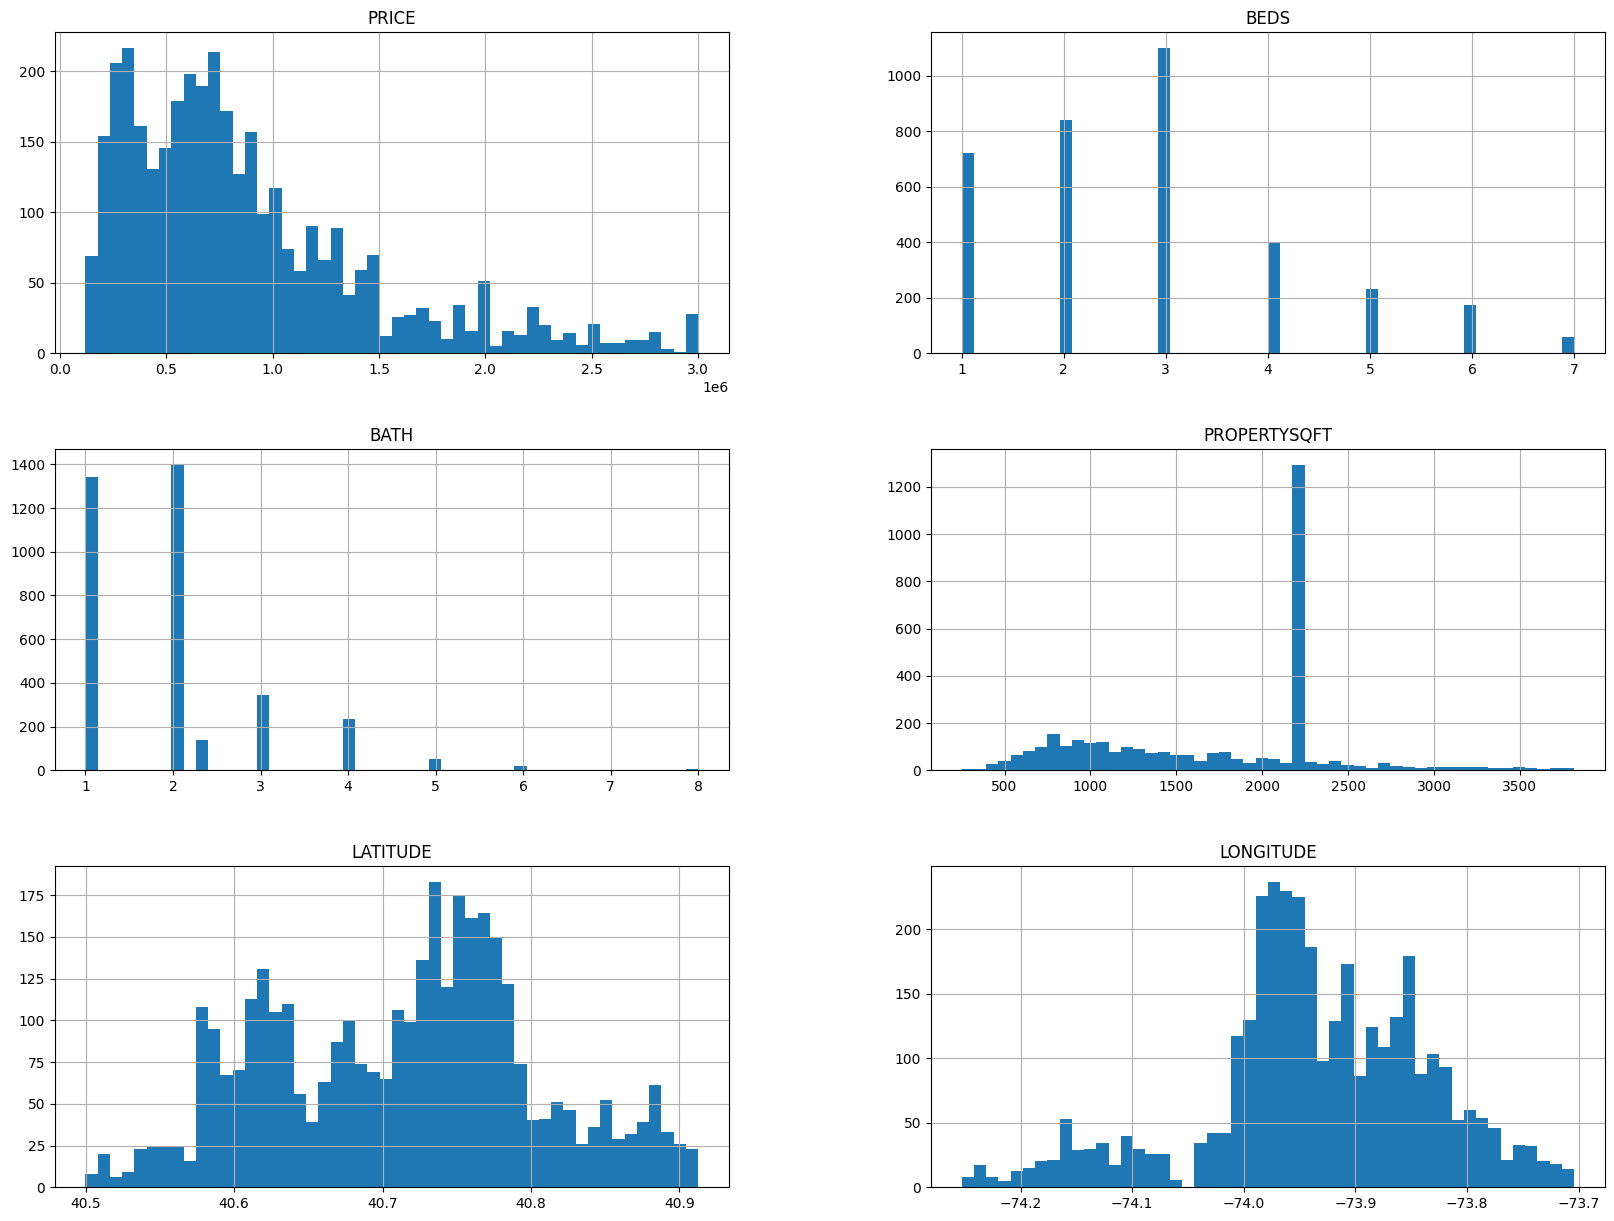

In [ ]:
#some histograms on the distribution of numerical variables in cleaned data
housing_no_outliers.hist(bins=50, figsize=(20,15))
plt.show()

From the histograms, we note the following:


* `Price` has a right skewed histogram indicating that most of the data points lean towards the cheaper priced houses, however there is still a tail trailing towards the right representing the more expensive houses in the data set.
* `BEDS` also has a right skewed histogram meaning the majority of the houses in the data set have around 3 bedrooms or less.
* `BATH` also has a right skewed histogram meaning that the majority of the houses in the data set have approximately 2.5 bathrooms or less! We include the half here since some houses can have part of a bathroom (i.e. toilet and sink but no shower/bath).
* `PROPERTYSQFT` has a left skewed histogram, however, its' peak is around 2,250 and the rest of the bins are significantly smaller than the peak and mainly to the left of the peak. This could indicate that most of the houses in the housing dataset tend to center around the same property square footage with a good majority also having around 2,250 square footage.
* `LONGITUDE` and `LATITUDE` appear symmetrical from the histograms which is expected.




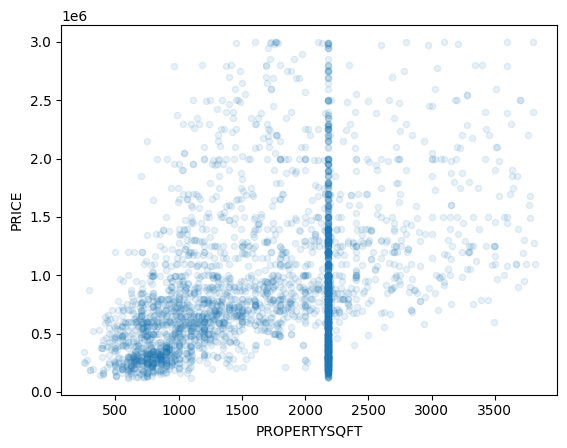

In [ ]:
# scatter plot on price vs property square footage
housing_no_outliers.plot(kind='scatter', x='PROPERTYSQFT', y='PRICE', alpha=0.1)
plt.show()

The scatter plot between property square footage and price shows a positive correlation. All the points show an upward trend towards the upper right portion of the plot, however, we do see how the points appear more spread out as property square footage increases.

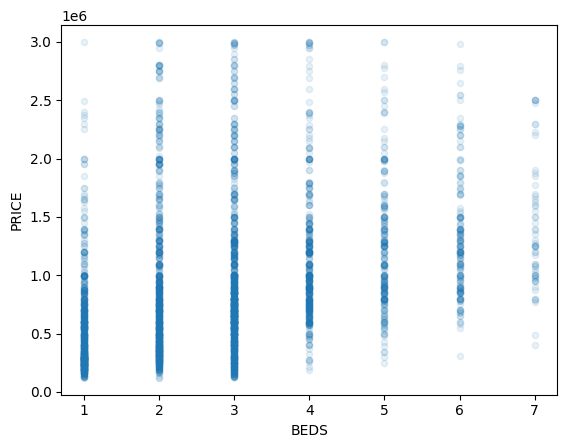

In [ ]:
# scatter plot on price vs amount of beds
housing_no_outliers.plot(kind='scatter', x='BEDS', y='PRICE', alpha=0.1)
plt.show()

From the plot of number of bedrooms and price, we can see that the prices of houses do seem to increase with the number of bedrooms, however, we note that there seems to be a lot of overlap between the price ranges across the different bedroom counts. Some of the properties with fewer bedrooms have prices that could be comparable to properties with more bedrooms meaning there are other influencing factors. From the spread, we see that the majority of the houses in the data are clustered towards the lower priced houses for each bedroom count. While we recognize the weak positive correlation between the amount of bedrooms and price, the wide distribution between these variables indicates that price is affected by multiple variables, not just `BEDS`.

In [ ]:
# scatter plot on price vs property square footage faceted by the two property types
import plotly.express as px

fig = px.scatter(
    housing_no_outliers,
    x='PROPERTYSQFT',
    y='PRICE',
    facet_col='PROPERTY_TYPE',  # Facet by 'PROPERTY_TYPE'
    facet_col_wrap=3,  # Wrap facets into 3 columns
    opacity=0.1,  # Set transparency
)
fig.show()

From the plots above, we see how both property types we distinguished in our data have a wide range of prices. `Condos/Co-Ops` scatter plot shows a more dense concentration of properties around lower square footages while `Residential Homes` have a wider spread of sizes/price. For both property types, we can say there is a positive correlation between property square footage and price. While `Condos/Co-Ops` are smaller in size on average, some properties prove to be pricey nonetheless likely due to other influencing factors. Some houses in the `Residential Homes` category are expensive despite being small.

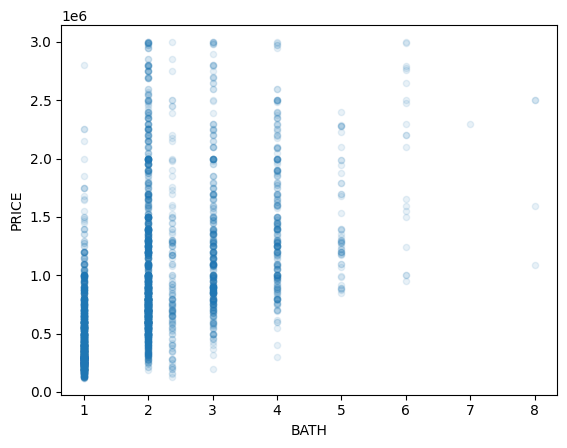

In [ ]:
# scatter plot on price vs amount of bathrooms
housing_no_outliers.plot(kind='scatter', x='BATH', y='PRICE', alpha=0.1)
plt.show()

The plot of `BATH` and `PRICE` of properties shows a general increase in price as the amount of bathrooms increases, but there is once again a significant overlap in prices across different bathroom counts for properties. We can distinctly see how properties with 1 - 4 bathrooms are the most common and these have a higher concentration of data points. Between 5 - 8 bathrooms, there are less amounts of properties but the properties that do have this many bathrooms are quite expensive! Overall, we note that properties with more bathrooms tend to be more pricey, however, there are definitely other factors affecting price which will need to be incorporated with `BATH`.

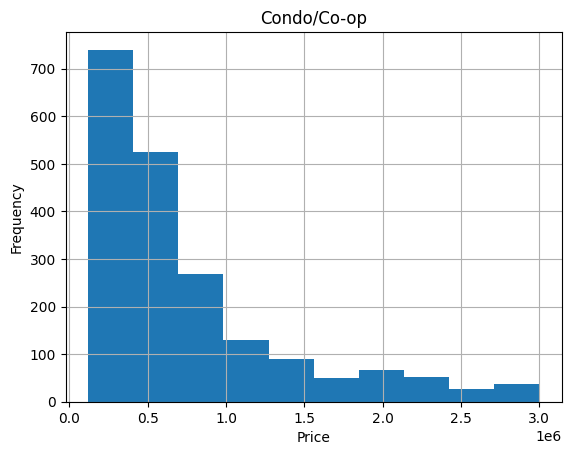

In [ ]:
# histogram on distribution of price of 'Condo/Co-op' Property Type
h = housing_no_outliers[housing_no_outliers['PROPERTY_TYPE'] == 'Condo/Co-op']['PRICE'].hist();
h.set_title('Condo/Co-op');
h.set_xlabel('Price');
h.set_ylabel('Frequency');

Visualizing the distribution of `Price` across the categorical variable `Condo/Co-op` with a histogram shows a right-skew in the data. This shows how most properties in the Condo/Co-op category tend to be not that expensive with very few being pricey, likely due to other factors.

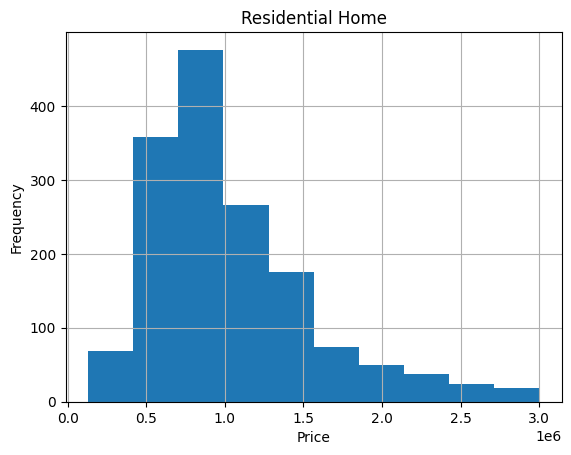

In [ ]:
# histogram on distribution of price for Property type 'Residential Home'
h2 = housing_no_outliers[housing_no_outliers['PROPERTY_TYPE'] == 'Residential_Home']['PRICE'].hist();
h2.set_title('Residential Home');
h2.set_xlabel('Price');
h2.set_ylabel('Frequency');

Visualizing the distribution of `Price` across the categorical variable `Residential Home` with a histogram shows a symmetrical/border-line right-skewness in the data. This shows how most properties in the Residential Home category tend to be around 1 Million dollars (this is about where the peak of the histogram is), but there are still significant amounts of properties worth less than 1 Million and more than that.

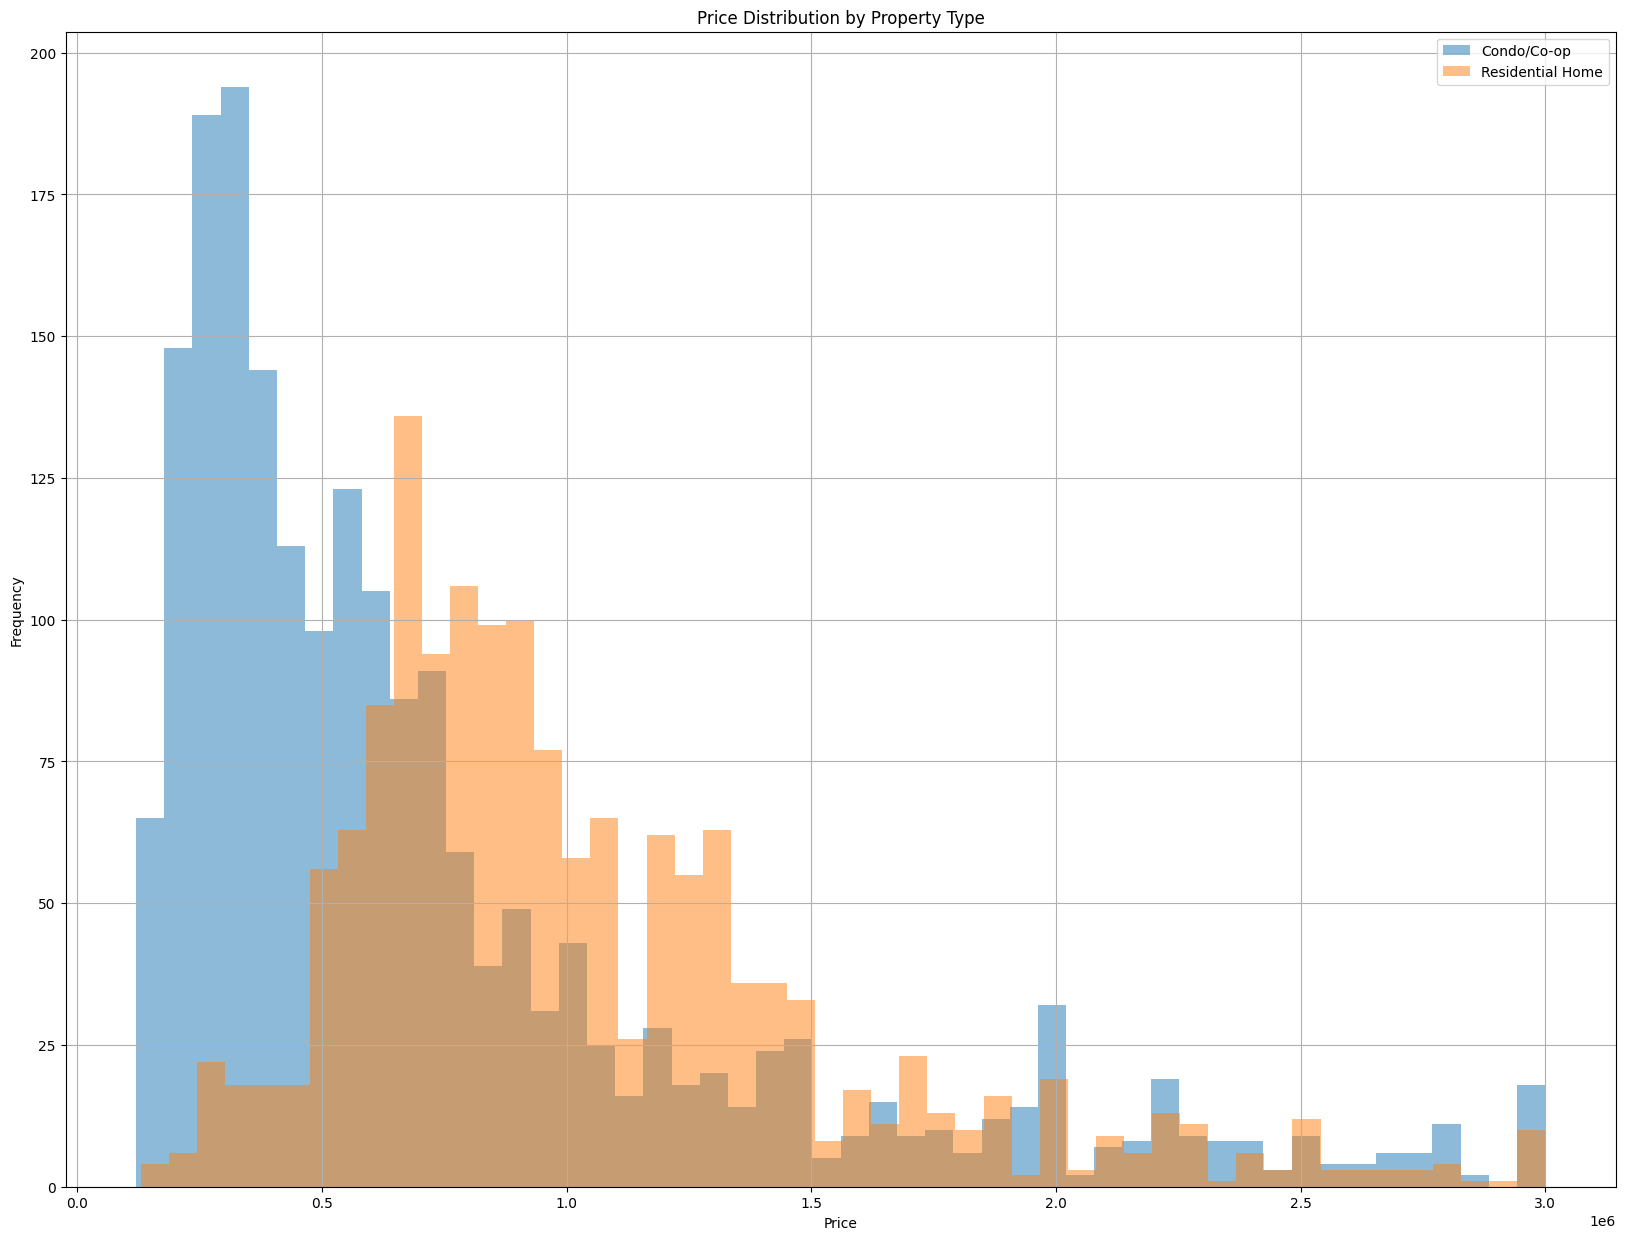

In [ ]:
#histogram of both property types distinguished

# Create subplots
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the histograms on the same axes
housing_no_outliers.groupby('PROPERTY_TYPE')['PRICE'].hist(bins=50,
                                                           alpha=0.5,
                                                           ax=ax)  # Specify the axes

# Set the title and labels for the plot
ax.set_title('Price Distribution by Property Type')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Add a legend
ax.legend(['Condo/Co-op', 'Residential Home'])
plt.show()

The overlapped histogram shows the distribution of both property types against price. This combined histogram helps show the difference between the price distribution of each property type which the blue color representing `Condo/Co-op` and the light orange color representing `Residential Home`. The dark histogram in the middle of these two suggest that these two categories have similar distributions.

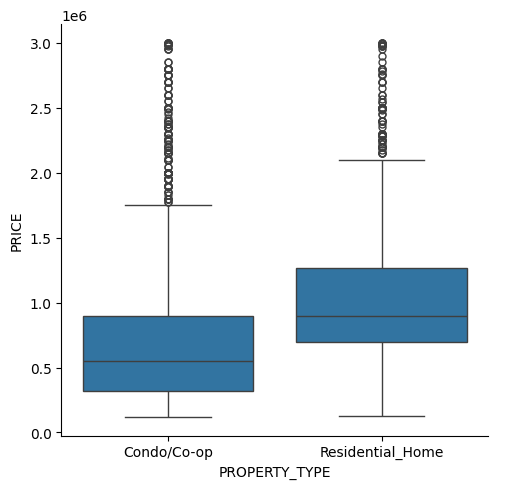

In [ ]:
#box plot of price distribution in each property type
sns.catplot(housing_no_outliers, x = 'PROPERTY_TYPE', y = 'PRICE', kind = 'box')

This box plot once again confirms that `Residential Homes` tend to be higher in price ranges, however, there are still a significant amount of outliers within both property types that result in pricey houses.

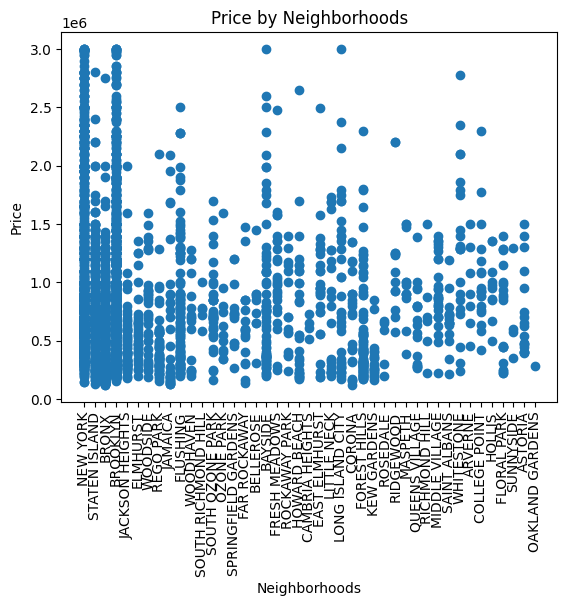

In [ ]:
#scatter plot of price distribution in each neighborhood
Neighborhoods = housing_no_outliers['Neighborhoods']
PRICE = housing_no_outliers['PRICE']

# Plot price against neighborhoods
plt.scatter(Neighborhoods, PRICE)
plt.xlabel("Neighborhoods")
plt.ylabel("Price")
plt.title("Price by Neighborhoods")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

The scatter plot above on price and each neighborhood in the data shows how certain neighborhoods such as `BRONX`, `NEW YORK`, `STATEN ISLAND`, and `BROOKLYN` have more data points indicating that most of the properties are located in these neighborhoods. In addition, neighborhoods such as `NEW YORK` and `BROOKLYN` have a wide range of priced properties with overlapping points ranging from the lower end to the higher end meaning that there are certain areas in both of these neighborhoods that are pricier or cheaper. Neighborhoods such as `HOLLIS`, `SUNNYSIDE`, and `SOUTH RICHMOND HILL` do not appear to have as many data points and the ones that they do have are all generally on the lower priced end indicating that houses in these neighborhoods are generally cheaper!

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Staten Island'),
  Text(2, 0, 'The Bronx'),
  Text(3, 0, 'Brooklyn'),
  Text(4, 0, 'Queens')])

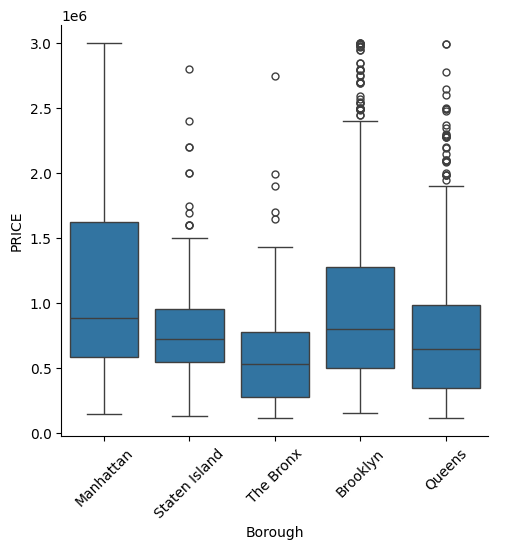

In [ ]:
#box plot of price distribution in each borough
sns.catplot(housing_no_outliers, x = 'Borough', y = 'PRICE', kind = 'box')
plt.xticks(rotation=45)

Visualizing the distribution of Price by each `Borough` we are able to see which areas tend to experience the most expensive properties. While each Borough ranges from cheap to pricey, we note that *Manhattan* appears to have the highest median priced properties in addition to wider range in prices with no outliers. *The Bronx* has the smallest median priced properties but this borough does still have some outliers a little below 3 Million dollars. Overall, most of the `Bourough's` have similar range in pricing for their properties with the medians of each borough falling fairly close to one another, but there are still differences in pricing that we can interpret to distinguish high-priced boroughs and low-priced ones.  

**CORRELATION ANALYSIS:**

Now that we have visualized the aspects of our data, we can run a correlation analysis to see which variables are related to each other for modeling. We recognize that the correlation matrix ranges from  ***-1.00*** to  ***1.00*** and values closer to *positive* 1.00 will represent variables that are highly correlated with one another.

Below is the correlation matrix on numerical variables:

In [ ]:
# correlation matrix on all numerical variables in our cleaned data
correlation_matrix = housing_no_outliers[['PRICE','BEDS','BATH','PROPERTYSQFT', 'LATITUDE',
                                               'LONGITUDE']].corr()
correlation_matrix

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.00,0.37,0.54,0.35,-0.05,-0.13
BEDS,0.37,1.00,0.68,0.47,-0.15,0.05
BATH,0.54,0.68,1.00,0.46,-0.16,-0.03
PROPERTYSQFT,0.35,0.47,0.46,1.00,-0.03,0.06
LATITUDE,-0.05,-0.15,-0.16,-0.03,1.00,0.52
LONGITUDE,-0.13,0.05,-0.03,0.06,0.52,1.00


To visualize this matrix on the numerical variables we create a correlation map shown below:

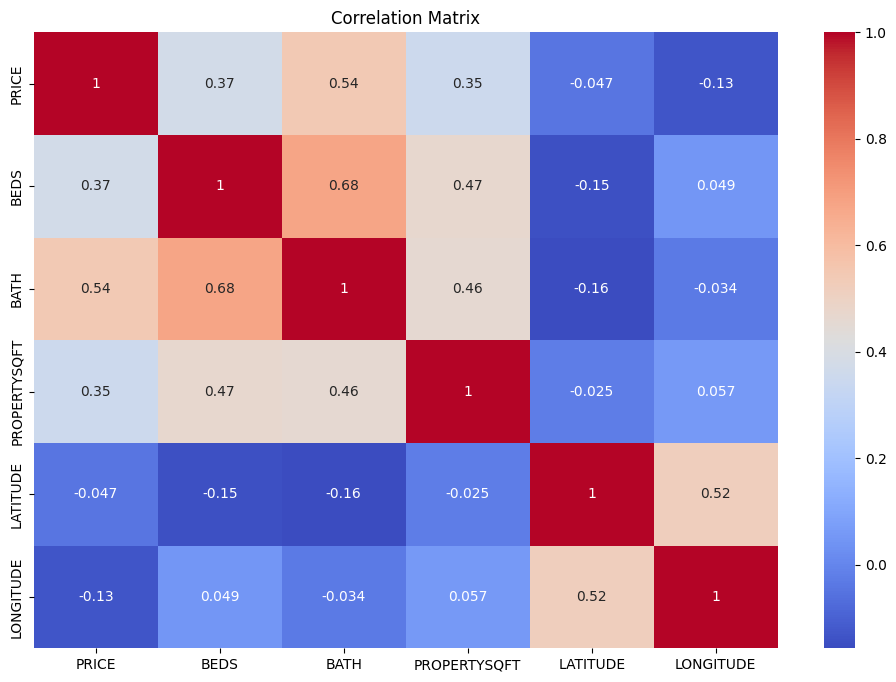

In [ ]:
#correlation map on all numerical variables
#note that variables with more red in them are more correlated
#variables with more blue in them are less correlated
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation map we note that the squares with light red to dark red colors have stronger correlation (i.e. `BEDS` and `BATH`), and squares with darker blue to light blue have weak to no correlation (i.e. `LATITUDE` and `BATH`).


***


Next we aim to combine *all* variables in our data (numerical and categorical) to get a better understanding of which variables are correlated to assist when modeling:

In [ ]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 10.8 MB/s eta 0:00:00


Below is a correlation matrix calculated using the Phik correlation coefficient, which is a statistical measure that can handle mixed data types:

In [ ]:
phik_matrix = housing_no_outliers.phik_matrix()
phik_matrix

interval columns not set, guessing: ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']


/usr/local/lib/python3.11/dist-packages/phik/data_quality.py:59: UserWarning:

The number of unique values of variable FORMATTED_ADDRESS is large: 3348. Are you sure this is not an interval variable? Analysis for pairs of variables including FORMATTED_ADDRESS can be slow.



,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PROPERTY_TYPE,ZIP,Neighborhoods,Borough
PRICE,1.00,0.40,0.52,0.52,1.00,0.29,0.38,0.59,0.58,0.39,0.41
BEDS,0.40,1.00,0.57,0.51,1.00,0.26,0.25,0.67,0.57,0.44,0.26
BATH,0.52,0.57,1.00,0.54,1.00,0.24,0.24,0.80,0.52,0.40,0.24
PROPERTYSQFT,0.52,0.51,0.54,1.00,1.00,0.38,0.34,0.64,0.49,0.34,0.42
FORMATTED_ADDRESS,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
LATITUDE,0.29,0.26,0.24,0.38,1.00,1.00,0.83,0.54,0.99,0.88,0.94
LONGITUDE,0.38,0.25,0.24,0.34,1.00,0.83,1.00,0.55,0.99,0.92,0.94
PROPERTY_TYPE,0.59,0.67,0.80,0.64,1.00,0.54,0.55,1.00,0.82,0.68,0.40
ZIP,0.58,0.57,0.52,0.49,1.00,0.99,0.99,0.82,1.00,1.00,1.00
Neighborhoods,0.39,0.44,0.40,0.34,1.00,0.88,0.92,0.68,1.00,1.00,1.00


To visualize this matrix on *all* variables we create a correlation map shown below:

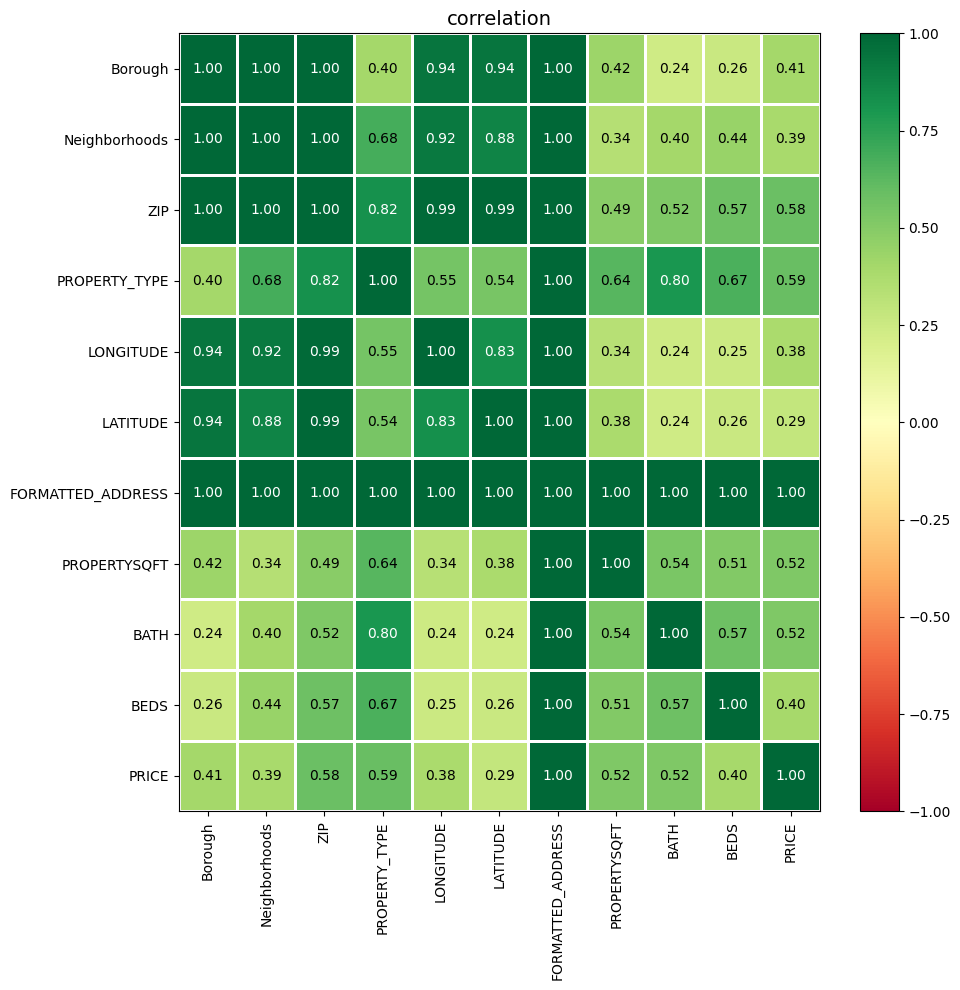

In [ ]:
plot_correlation_matrix(phik_matrix.values,
                        x_labels=phik_matrix.columns,
                        y_labels=phik_matrix.index,
                        figsize=(10,10))

From the correlation map we note that the squares with dark red to light red colors have weak to no correlation (none shown in map), and squares with lighter green to dark green have little to strong correlation (i.e. `PROPERTY_TYPE` and `BATH`).

# Feature Engineering

Steps:
1. Create New Features
2. Encode Categorical Variables
3. Scale and Normalize Data
4. Feature Selection and Interaction
5. Validate Features

From correlation map on all numerical variables:

Strong correlations:
BEDS and BATH (0.68): Suggests houses with more bedrooms typically have more bathrooms. Signs of multicollinearity
LATITUDE, LONGITUDE, and ZIP (~0.52): Geographical information is related, meaning you should avoid including all three to prevent multicollinearity.

Moderate correlations with PRICE:
BATH (0.54): Stronger indicator of price than bedrooms or square footage.
BEDS (0.37) and PROPERTYSQFT (0.35): Also significant but less predictive than bathrooms.

Weak/Negative correlations:
LATITUDE, LONGITUDE, and ZIP have weak correlations with PRICE. However, they might still capture location effects, which could be important for house prices.

We want encode variables : PROPERTY_TYPE, Borough, ZIP, Neighborhoods, to make an correlation map on categorical variables

In [ ]:
# One-hot encode PROPERTY_TYPE and Borough
housing_encoded = pd.get_dummies(
    housing_no_outliers,
    columns=['PROPERTY_TYPE', 'Borough'],
    drop_first=True  # Drops the first category to avoid multicollinearity
)

# Frequency encoding for ZIP and Neighborhoods
zip_counts = housing_no_outliers['ZIP'].value_counts().to_dict()
neighborhood_counts = housing_no_outliers['Neighborhoods'].value_counts().to_dict()

housing_encoded['ZIP_Encoded'] = housing_no_outliers['ZIP'].map(zip_counts)
housing_encoded['Neighborhoods_Encoded'] = housing_no_outliers['Neighborhoods'].map(neighborhood_counts)


In [ ]:
# Check the first few rows to confirm encoding
print(housing_encoded.head())

    PRICE  BEDS  BATH  PROPERTYSQFT  \
0  315000     2  2.00       1400.00   
2  260000     4  2.00       2015.00   
6  899500     2  2.00       2184.21   
8  265000     1  1.00        750.00   
9  440000     2  1.00        978.00   

                                   FORMATTED_ADDRESS  LATITUDE  LONGITUDE  \
0  Regis Residence, 2 E 55th St #803, New York, N...     40.76     -73.97   
2     620 Sinclair Ave, Staten Island, NY 10312, USA     40.54     -74.20   
6        157 W 126th St #1b, New York, NY 10027, USA     40.81     -73.95   
8  Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...     40.82     -73.87   
9       1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA     40.62     -73.97   

     ZIP  Neighborhoods  PROPERTY_TYPE_Residential_Home  Borough_Manhattan  \
0  10022       NEW YORK                           False               True   
2  10312  STATEN ISLAND                            True              False   
6  10027       NEW YORK                           False             

In [ ]:
# Confirm no categorical variables remain
print(housing_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 4378
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PRICE                           3531 non-null   int64  
 1   BEDS                            3531 non-null   int64  
 2   BATH                            3531 non-null   float64
 3   PROPERTYSQFT                    3531 non-null   float64
 4   FORMATTED_ADDRESS               3531 non-null   object 
 5   LATITUDE                        3531 non-null   float64
 6   LONGITUDE                       3531 non-null   float64
 7   ZIP                             3531 non-null   object 
 8   Neighborhoods                   3531 non-null   object 
 9   PROPERTY_TYPE_Residential_Home  3531 non-null   bool   
 10  Borough_Manhattan               3531 non-null   bool   
 11  Borough_Queens                  3531 non-null   bool   
 12  Borough_Staten Island           3531 no

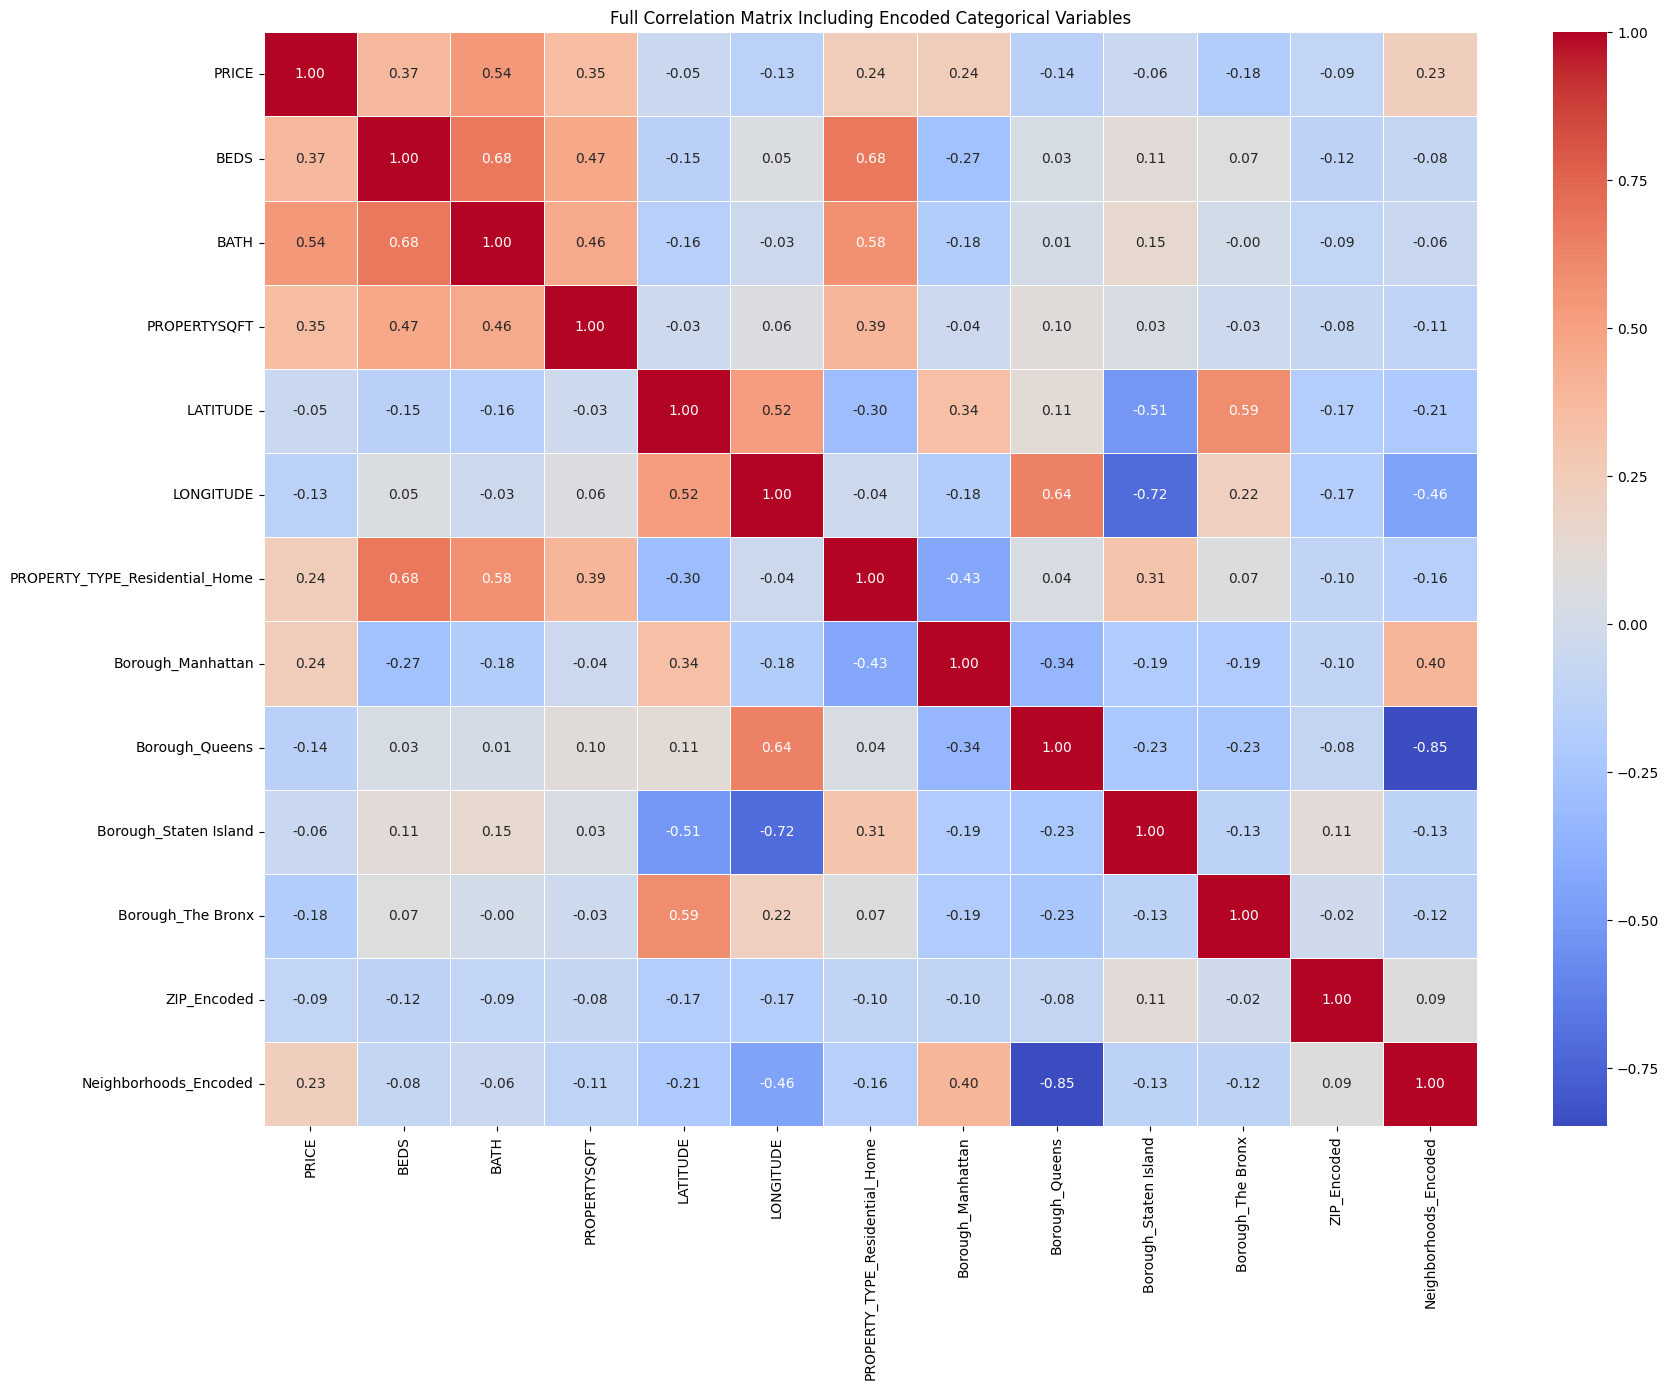

In [ ]:
# Convert boolean columns to integers for correlation
bool_columns = ['PROPERTY_TYPE_Residential_Home', 'Borough_Manhattan', 'Borough_Queens',
                'Borough_Staten Island', 'Borough_The Bronx']

housing_encoded[bool_columns] = housing_encoded[bool_columns].astype(int)

# Drop non-numeric and irrelevant columns for correlation
correlation_data = housing_encoded.drop(['FORMATTED_ADDRESS', 'ZIP', 'Neighborhoods'], axis=1)

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Full Correlation Matrix Including Encoded Categorical Variables')
plt.tight_layout()
plt.show()


The full correlation heatmap provided a comprehensive view of the relationships between all numerical and encoded categorical variables in the dataset. It revealed strong positive correlations between BATH, BEDS, and PROPERTYSQFT, indicating that larger properties with more rooms tend to be priced higher. Geographic variables like LATITUDE and LONGITUDE also showed significant correlations with PRICE, highlighting the importance of location in property valuation. Categorical variables, such as Borough_Manhattan, displayed a positive correlation with price, suggesting higher property values in Manhattan. Conversely, features like Borough_The Bronx and ZIP_Encoded showed weaker or negative correlations, indicating areas with generally lower property prices. This analysis helped identify key features influencing housing prices and guided the selection of variables for the predictive model.

# Predictive Modeling

In this part, we tried the following modeling approaches to predict `housing price`:
- Multiple Linear Regression
- Logistic Regression
- Random Forest


In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score, train_test_split,KFold


**Multiple Linear Regression**

***MLR- includes all five significant predictors***

According the results from EDA, this MLR model focused on these five predictors which have stronger correlation with Price.

      predictors:BEDS, BATH, PROPERTYSQFT, PROPERTY_TYPE, Borough
      Target:PRICE

In [ ]:
model = smf.ols("PRICE ~ BEDS + BATH + PROPERTYSQFT + PROPERTY_TYPE + Borough" , data=housing_no_outliers)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     388.8
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:05:51   Log-Likelihood:                -50839.
No. Observations:                3531   AIC:                         1.017e+05
Df Residuals:                    3522   BIC:                         1.018e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

*Significant Factors (p-value < 0.05)*

Property Type:
- Residential Homes are priced $54,940 higher on average than the baseline

property type.

Borough:
- Houses in Manhattan are priced $342,100 higher than the baseline borough.

- Houses in Queens are 217,400 lower, in Staten Island 320,700 lower, and in the Bronx 372,700 lower compared to the baseline borough.

Number of Bedrooms (BEDS):
- Each additional bedroom increases the house price by $24,050.

Number of Bathrooms (BATH):
- Bathrooms have a strong positive effect, with each additional bathroom increasing the price by $295,900.

Property Size (PROPERTYSQFT):
- Each additional square foot increases the price by $89.18.

**Model Performance**

R-squared = 0.469: The model explains 46.9% of the variance in house prices.
Adjusted R-squared = 0.468: Similar to R², indicating a reasonable model fit.

=> While this is moderate, it suggests there might be other important factors missing.


***Variables selection***

To enhance the predictive accuracy of the Multiple Linear Regression (MLR) model, Forward Selection and Lasso Regression were applied to identify the most influential features


**Forward selection:**

In [ ]:
housing_data = housing_encoded.drop(columns=['FORMATTED_ADDRESS',"ZIP", "PRICE_BINARY", 'Neighborhoods'], errors="ignore")

housing_data = pd.get_dummies(housing_data, drop_first=True)

y = housing_data["PRICE"]
X = housing_data.drop(columns=["PRICE"], errors="ignore")

def forward_selection_cv(X, y, max_features=10, cv_folds=5):
    selected_features = []
    remaining_features = list(X.columns)
    best_cv_r2 = -np.inf

    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    while remaining_features and len(selected_features) < max_features:
        cv_r2_scores = pd.Series(index=remaining_features, dtype=np.float64)

        for feature in remaining_features:
            try:
                current_features = selected_features + [feature]
                X_subset = X[current_features]

                model = LinearRegression()
                scores = cross_val_score(model, X_subset, y, cv=kf, scoring='r2')
                cv_r2_scores[feature] = np.mean(scores)
            except:
                cv_r2_scores[feature] = -np.inf

        max_cv_r2 = cv_r2_scores.max()

        if max_cv_r2 > best_cv_r2:
            best_feature = cv_r2_scores.idxmax()
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_cv_r2 = max_cv_r2
        else:
            break

    return selected_features, best_cv_r2

selected_features_cv, best_cv_r2 = forward_selection_cv(X, y)

print("Selected Features with Cross-Validation:", selected_features_cv)
print("Best Cross-Validated R²:", best_cv_r2)


Selected Features with Cross-Validation: ['BATH', 'Borough_Manhattan', 'Neighborhoods_Encoded', 'Borough_Queens', 'PROPERTYSQFT', 'LONGITUDE', 'LATITUDE', 'PROPERTY_TYPE_Residential_Home', 'BEDS', 'Borough_Staten Island']
Best Cross-Validated R²: 0.4870808951745742


In [ ]:
X_best = X[selected_features_cv]
X_best = sm.add_constant(X_best)

mlr_model = sm.OLS(y, X_best).fit()

print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     343.3
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:06:01   Log-Likelihood:                -50755.
No. Observations:                3531   AIC:                         1.015e+05
Df Residuals:                    3520   BIC:                         1.016e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Model Performance:**

- R² = 0.494 and Adjusted R² = 0.492 indicate a moderate improvement in explaining price variation.

- Significant Predictors: BATH, BEDS, PROPERTYSQFT, LATITUDE, and LONGITUDE have strong statistical significance (p-value < 0.05).

- Geographical Influence: The boroughs, especially Manhattan (higher prices) and Staten Island (lower prices), significantly impact housing values.

However, it still lacks some explanatory power, suggesting the potential for further improvements.

**Lasso selection:**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)

selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", list(selected_features))

cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

test_r2 = lasso.score(X_test, y_test)
print("Test R² Score:", test_r2)

Selected Features: ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'PROPERTY_TYPE_Residential_Home', 'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island', 'Borough_The Bronx', 'ZIP_Encoded', 'Neighborhoods_Encoded']
Cross-Validation R² Scores: [0.48406618 0.51597389 0.52688656 0.47421678 0.43815759]
Mean R²: 0.48786020089407545
Test R² Score: 0.4813671331894097


In [ ]:
X_best_lasso = X[selected_features]
X_best_lasso = sm.add_constant(X_best_lasso)

mlr_model_lasso = sm.OLS(y, X_best_lasso).fit()

print(mlr_model_lasso.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     286.5
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:06:05   Log-Likelihood:                -50753.
No. Observations:                3531   AIC:                         1.015e+05
Df Residuals:                    3518   BIC:                         1.016e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Similar property and location-related variables as Forward Selection, with additional selection of ZIP_Encoded and Borough_The Bronx. ZIP_Encoded provides more granular location-based insights, which could refine price predictions.

**Model Performance:**

- R² = 0.494 and Adjusted R² = 0.493, nearly identical to Forward Selection.
- Lasso slightly expanded the feature set but did not significantly improve the model’s predictive power.


**Added modification in MLR**

- Incorporating ZIP Codes as Categorical Variables
- Adding Neighborhoods as Categorical Variables
- Including a Binary Price Classification Feature (PRICE_BINARY)


In [ ]:
median_price = housing_no_outliers["PRICE"].median()
housing_no_outliers["PRICE_BINARY"] = (housing_no_outliers["PRICE"] > median_price).astype(int)
model2 = smf.ols("PRICE ~ BEDS + BATH + PROPERTYSQFT + ZIP + Neighborhoods + PRICE_BINARY" , data=housing_no_outliers)
result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     42.13
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:06:06   Log-Likelihood:                -49875.
No. Observations:                3531   AIC:                         1.001e+05
Df Residuals:                    3351   BIC:                         1.012e+05
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**Model Performance:**

This model showed a substantial increase in R² from 0.494 to 0.692 (Adjusted R²: 0.676), indicating the model now explains 69.2% of the variance in housing prices, compared to only 49.4% in the previous models. PRICE_BINARY helps the model capture pricing trends more effectively, reducing residual variance.

- The ZIP Codes `10003`, `10006`, `10031`, `10032`, `10033`, `10034`, `10035`, `10037`, `10039`, `10307`, `10463`, `10471`, `10472`, `11109`, `11201`, `11203`, `11207`, `11208`, `11210`, `11211`, `11212`, `11217`,`11222`, `11223`, `11224`, `11229`, `11230`, `11231`, `11234`, `11236`, `11238`, `11249`, `11357`, `11369`, `11370`, `11373`, and `11375` are all significant at the `p < 0.05` level.

- Neighborhoods: Astoria, Bronx, Brooklyn, Elmhurst, Flushing, Forest Hills, Long Island City, New York, South Ozone Park, and Whitestone are all significant at the `p < 0.05` level.

- `Beds`, `Bath`, `PRICE_BINARY` and  `PROPERTYSQFT` are all significant at the `p < 0.05` level.

-  Certain ZIP codes have distinct real estate trends (e.g., luxury areas vs. lower-income regions), which helps explain more of the price variation.
Some ZIP codes, like 10003 (Greenwich Village) and 10006 (Financial District), have significant positive coefficients, meaning they are associated with higher prices.

- Others, like 10031 (Washington Heights) and 10032 (Harlem), have negative coefficients, indicating lower property values.


- Some neighborhoods (e.g., Brooklyn, Long Island City, New York City) have significant positive effects on price.

- Others (e.g., South Ozone Park, The Bronx, and Staten Island) have negative coefficients, indicating lower-priced housing.


In [ ]:
Neighbors = ["Astoria", "Bronx", "Brooklyn", "Elmhurst", "Flushing",
"Forest Hills", "Long Island City", "New York", "South Ozone Park", "Whitestone"]
Zip = ["10003", "10006", "10031", "10032", "10033", "10034", "10035", "10037",
        "10039", "10307", "10463", "10471", "10472", "11109", "11201", "11203",
        "11207", "11208", "11210", "11211", "11212", "11217","11222", "11223",
        "11224", "11229", "11230", "11231", "11234", "11236", "11238", "11249",
        "11357", "11369", "11370", "11373", "11375"]


**Logistic Regression**

In [ ]:
median_price = housing_no_outliers["PRICE"].median()
housing_no_outliers["PRICE_BINARY"] = (housing_no_outliers["PRICE"] > median_price).astype(int)

features = "BEDS + BATH + PROPERTYSQFT + C(Borough)"
target = "PRICE_BINARY"

scaler = StandardScaler()
housing_no_outliers[["BEDS", "BATH", "PROPERTYSQFT"]] = scaler.fit_transform(housing_no_outliers[["BEDS", "BATH", "PROPERTYSQFT"]])

formula2 = f"{target} ~ {features}"
logit_model = smf.logit(formula2, data=housing_no_outliers)
result2 = logit_model.fit()

print(result2.summary())


Optimization terminated successfully.
         Current function value: 0.434693
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           PRICE_BINARY   No. Observations:                 3531
Model:                          Logit   Df Residuals:                     3523
Method:                           MLE   Df Model:                            7
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.3729
Time:                        20:06:06   Log-Likelihood:                -1534.9
converged:                       True   LL-Null:                       -2447.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.5365      0.091      5.874      0.000   

**Analysis on binary logistic regression (classifying houses' prices as high(1) or low (0) based on median price)**

**Model Performance**:

- Pseudo R² = 0.3843 → The model explains 38.4% of the variation in housing price classification.
- Property Location is the Most Important Factor: Manhattan = High-priced, Bronx & Staten Island = Low-priced
- Bathrooms Have the Strongest Effect on Pricing. More bathrooms = Much higher odds of a high-priced home.
- Bedrooms and Square Footage Matter, but to a Lesser Extent. Larger properties increase price, but less than bathrooms and borough.
- Residential Homes are More Likely to be High-Priced than Condos/Co-Ops. Detached houses tend to be more expensive than condos.


**Random Forest**

<ipython-input-71-f9b820b6308e>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




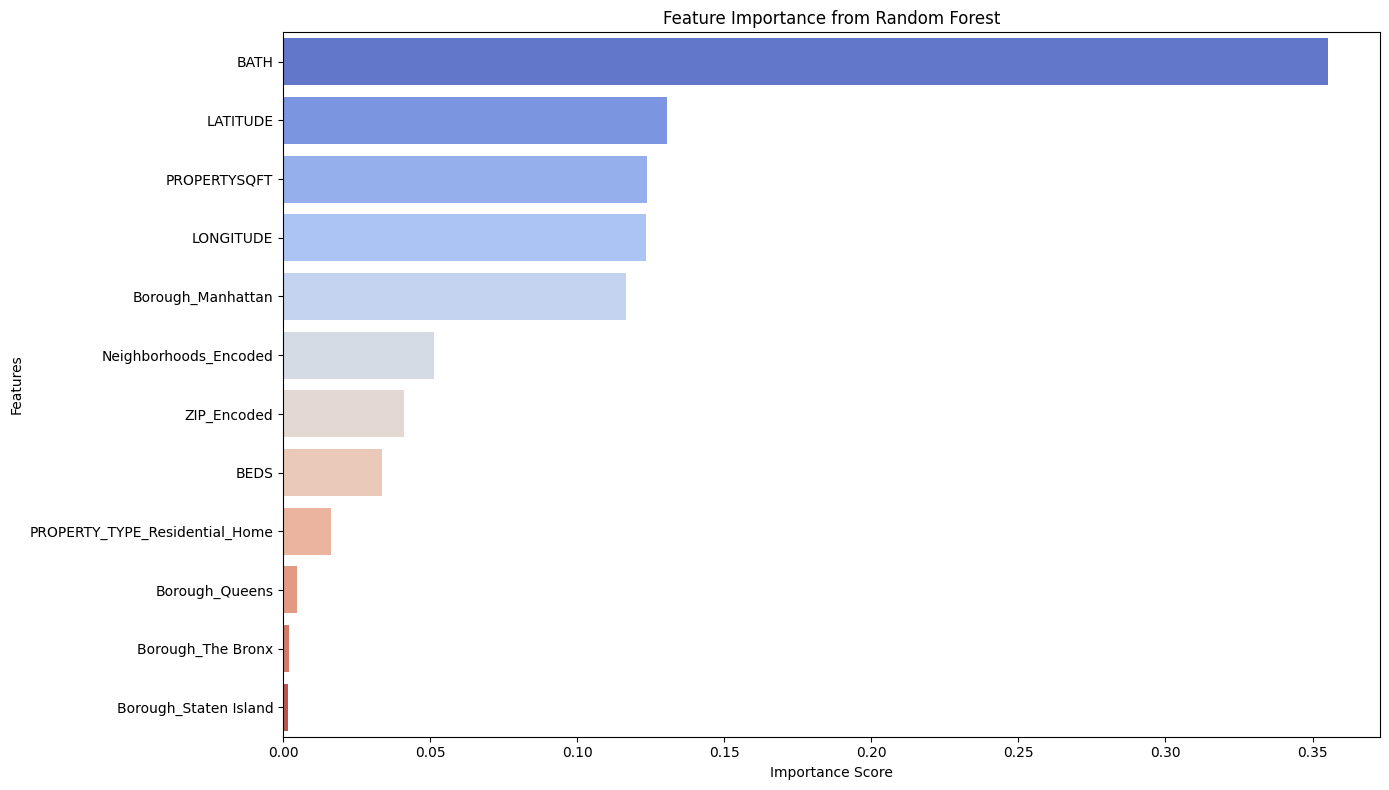

Top 10 Important Features:
 BATH                             0.36
LATITUDE                         0.13
PROPERTYSQFT                     0.12
LONGITUDE                        0.12
Borough_Manhattan                0.12
Neighborhoods_Encoded            0.05
ZIP_Encoded                      0.04
BEDS                             0.03
PROPERTY_TYPE_Residential_Home   0.02
Borough_Queens                   0.00
dtype: float64


In [ ]:
X = housing_encoded.drop(['PRICE', 'FORMATTED_ADDRESS', 'ZIP', 'Neighborhoods'], axis=1)
y = housing_encoded['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=167)

rf_model = RandomForestRegressor(n_estimators=100, random_state=167)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='coolwarm')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

top_10_features = feature_importances.head(10)
print("Top 10 Important Features:\n", top_10_features)

Random Forest was trained on the dataset, leveraging its ability to handle complex, non-linear relationships and multicollinearity, which is common in housing price data. Unlike linear regression, which assumes a direct relationship between variables, Random Forest is particularly useful in capturing interactions between variables and handling high-dimensional data.

After training, the model’s feature importance scores were extracted, revealing the most influential predictors of housing prices. These were visualized in the bar plot, allowing for easy identification of key variables impacting property values.

The **top predictors** identified include:

- Bathrooms (BATH) – The most critical factor, indicating that additional bathrooms significantly drive up home prices.

- Latitude & Longitude – Geospatial location plays a major role in price determination, highlighting the importance of property placement within New York City.

- Property Size (PROPERTYSQFT) – Larger homes generally command higher prices.
Borough & Neighborhood Factors – Manhattan has a strong positive influence, whereas other boroughs, particularly The Bronx and Staten Island, have much weaker effects.

- ZIP Code & Neighborhood Encoding – These provide fine-grained location-based price variations beyond just borough-level insights.

- Bedrooms (BEDS) – Though important, its influence is lower than bathrooms and total square footage, indicating that the quality of living space (BATH, PROPERTYSQFT) is more impactful than just the number of bedrooms.


After training, the model predicted property prices, which were evaluated using Root Mean Squared Error (RMSE) and R² score to measure prediction accuracy and variance explanation. The results were visualized with an actual vs. predicted prices plot, providing a clear view of how well the model performed in predicting housing prices.

Model Evaluation Metrics:
Root Mean Squared Error (RMSE): 345589.98
R² Score: 0.6712


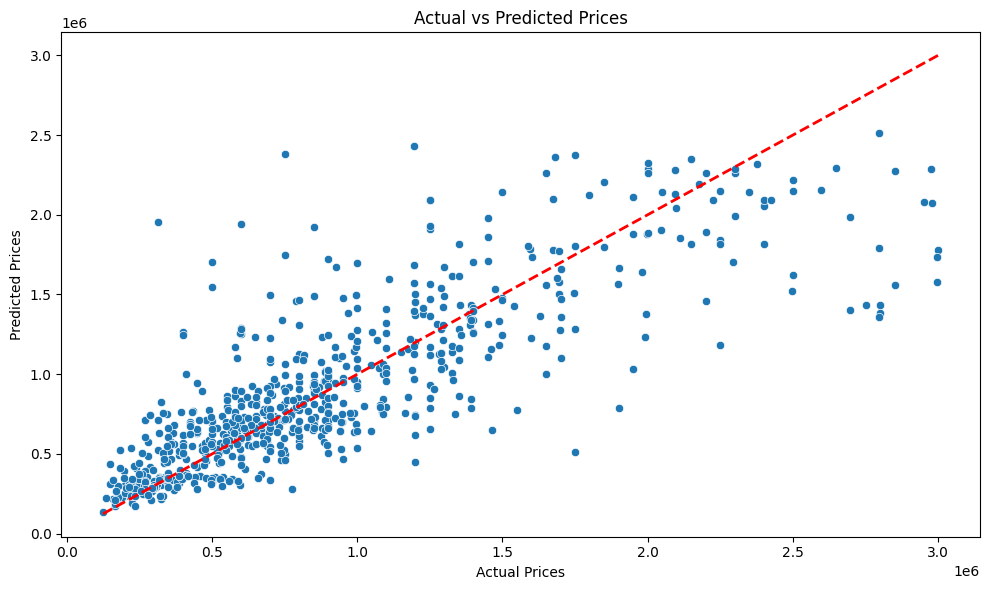

In [ ]:
important_features = ['LATITUDE', 'LONGITUDE', 'BATH', 'PROPERTYSQFT', 'Neighborhoods_Encoded', 'Borough_Manhattan']

X_refined = housing_encoded[important_features]
y_refined = housing_encoded['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, test_size=0.2, random_state=167)

rf_refined_model = RandomForestRegressor(n_estimators=100, random_state=167)
rf_refined_model.fit(X_train, y_train)

y_pred = rf_refined_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()


**Model Performance:**

- The model achieved an R² score of 0.6712, meaning it explains around 67.12% of the variance in housing prices, indicating moderately strong predictive power.
- The Root Mean Squared Error (RMSE) of $345,589.98 dollars suggests that, on average, predictions deviate from actual prices by about $346,000.
- Some scatter around higher price ranges indicates potential difficulty in accurately predicting very expensive properties
- Overall, this model performs reasonably well for mid-range properties, offering a useful price estimation tool for buyers and sellers.

# Conclusion

This project successfully analyzed the key factors influencing housing prices in New York using data-driven statistical and machine learning techniques. Through extensive data preprocessing, exploratory data analysis (EDA), feature engineering, and predictive modeling, we identified critical price determinants and developed models to estimate property values with reasonable accuracy.

**Key insights include:**

- Location is the most significant price driver, with Manhattan properties commanding the highest prices, while Staten Island and The Bronx generally have lower property values.

- Bathrooms are more influential than bedrooms in predicting price, indicating that high-end amenities contribute more to valuation than simply the number of rooms.

- Property square footage positively impacts price, but location-based factors such as ZIP codes and neighborhoods refine price variation within boroughs.

- Random Forest emerged as the strongest predictive model, achieving an R² score of 66.83%, meaning it explains about two-thirds of the variance in housing prices. However, its RMSE of $347,100.64 suggests that further improvements are needed, particularly for high-priced properties.

- Logistic regression successfully classified properties as high-priced or low-priced, revealing that Manhattan homes, residential properties, and houses with more bathrooms have significantly higher odds of being expensive.

Despite these findings, some factors not included in the dataset (e.g., proximity to subway stations, crime rates, school quality, economic trends) likely play a role in housing price determination. The scatter in high-value property predictions suggests that luxury real estate is harder to model using conventional features alone.



## Recommendations
- Enhance Feature Engineering with External Data

- Integrate location-based socioeconomic variables such as proximity to transit, schools, crime rates, and commercial districts.

- Apply segmented modeling, where separate models are built for low, mid, and high-tier housing markets, capturing unique pricing dynamics at each level.

In conclusion, this project provides a strong foundation for understanding New York’s housing market, leveraging machine learning to improve price predictions. While the models offer moderate-to-strong predictive accuracy, incorporating real-world external factors and advanced ML techniques can further enhance pricing insights and support better decision-making in real estate investments.










In [ ]:
%%writefile README.md

Writing README.md


In [ ]:
from google.colab import files
files.view('/content/README.md')


<IPython.core.display.Javascript object>